In [2]:
import pandas as pd
import numpy as np
import re
import collections
import contractions
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('DataSet.csv', encoding='latin')
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI â Environmental Syst...,<ul>\r\n<li>\r\n<b>EDUCATION:Â </b>Bachelorâ...,<p>Our culture is anything but corporateâwe ...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [4]:
df.shape

(17880, 18)

In [5]:
print(df['title'].unique().size)
print(df['location'].unique().size)
print(df['department'].unique().size)
print(df['employment_type'].unique().size)
print(df['required_experience'].unique().size)
print(df['required_education'].unique().size)
print(df['industry'].unique().size)
print(df['function'].unique().size)

11231
3106
1338
6
8
14
132
38


<Axes: xlabel='fraudulent', ylabel='count'>

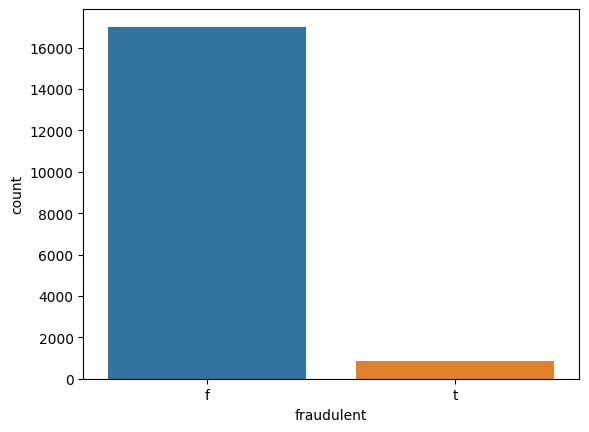

In [6]:
sns.countplot(x=df['fraudulent'])

<Axes: xlabel='in_balanced_dataset', ylabel='count'>

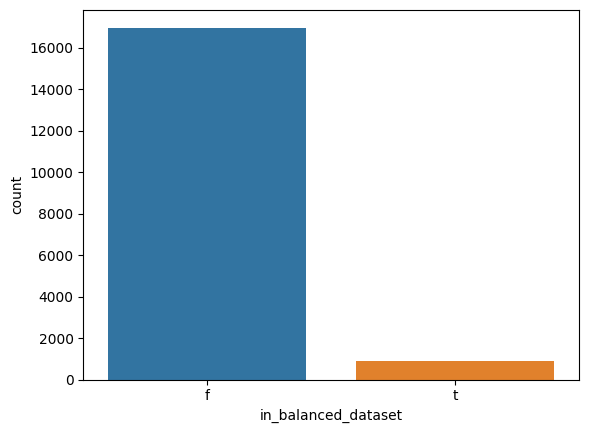

In [7]:
sns.countplot(x=df['in_balanced_dataset'])

In [8]:
df_balanced=df[df['in_balanced_dataset']=='t']

In [9]:
df_balanced.head(10)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
144,Forward Cap.,NaN,NaN,NaN,NaN,<p>The group has raised a fund for the purchas...,NaN,NaN,f,f,f,NaN,NaN,NaN,NaN,NaN,t,t
180,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,<p>Sales Executive</p>,<p>Sales Executive</p>,<p>Sales Executive</p>,f,f,f,NaN,NaN,NaN,NaN,Sales,t,t
493,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"<p>A Newly established company seeks outgoing,...","<p>Must have good knowledge of Outlook, Micros...",NaN,f,f,f,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,t,t
1152,Administrative Assistant,"US, MI, FLINT",NaN,NaN,NaN,<p>Administrative Assistant<br><br>Essential J...,NaN,NaN,f,f,f,Full-time,Entry level,Unspecified,Hospital & Health Care,Administrative,t,t
1297,Custom Products Account Maestro,"US, NY, Port Chester",NaN,NaN,NaN,<p><!--[if gte mso 9]><xml>\r\n <o:OfficeDocum...,<p><!--[if gte mso 9]><xml>\r\n <o:OfficeDocum...,NaN,f,f,f,Full-time,Not Applicable,NaN,Consumer Goods,Customer Service,f,t
1407,Data Entry Admin/Clerical Positions - Work Fro...,"US, AK, Anchorage",NaN,NaN,NaN,<p>ACCEPTING ONLINE APPLICATIONS ONLY</p>\r\n<...,NaN,NaN,f,f,f,NaN,NaN,NaN,NaN,NaN,t,t
1549,"International Broadcaster, Somali Language","US, DC,",NaN,NaN,<p><b>Applied Memetics LLC</b>Â is a professio...,<p>The International Broadcaster shall have at...,<p>The International Broadcaster shall properl...,NaN,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Broadcast Media,NaN,f,t
1662,administrative assistance,"US, NY, Moravia",admin,13-20,NaN,<p>This position is for an Administrative Assi...,<ul>\r\n<li>Must be proficient with Outlook</l...,<p>Benefit includes: health and welfare covera...,f,f,f,Other,Entry level,High School or equivalent,Accounting,Administrative,t,t
1700,Cruise Staff Wanted *URGENT*,"US, NY, MANHATTAN",NaN,NaN,NaN,<p><b>6* Ultra Luxury American Cruise Company ...,<p><b>Certification &amp; Experience:</b>Â Pre...,<p><b>Benefits:</b>Â On board en suite accommo...,f,f,f,Full-time,NaN,NaN,"Leisure, Travel & Tourism",NaN,t,t
1878,KMC,NaN,NaN,NaN,NaN,<p>This is for the KMC project.</p>\r\n<p></p>...,NaN,NaN,f,f,f,NaN,NaN,NaN,NaN,NaN,t,t


In [10]:
df_balanced.shape

(900, 18)

In [11]:
print(df_balanced['title'].unique().size)
print(df_balanced['location'].unique().size)
print(df_balanced['department'].unique().size)
print(df_balanced['employment_type'].unique().size)
print(df_balanced['required_experience'].unique().size)
print(df_balanced['required_education'].unique().size)
print(df_balanced['industry'].unique().size)
print(df_balanced['function'].unique().size)

700
483
151
6
8
12
80
34


<Axes: xlabel='fraudulent', ylabel='count'>

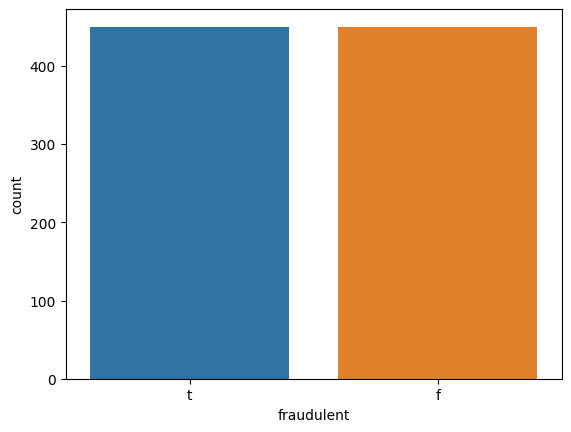

In [12]:
sns.countplot(x=df_balanced['fraudulent'])

In [13]:
import os  

df_balanced.to_csv('balanced_dataset.csv',index=False)